In [1]:
#For Fetching html of website
import requests 
from bs4 import BeautifulSoup

#For Pretty Print
import pprint

#For Regular Expression & Text Filtering 
import re
#Regex Validator
#https://regex101.com/

#For Dataframe & Ploting
import pandas as pd

#For Geting Argument Names 
import traceback

#For Plotting & Graph
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#For PreProcessing, Scaling & Normalizing
from sklearn.preprocessing import MinMaxScaler

#global variable
c1=""
c2=""

In [29]:
def GetHtml(_url):
    return BeautifulSoup(requests.get(str(_url)).content,'html.parser')

In [30]:
def GetElementHtmlList(_soup,_element,_class):
    temp = list()
    for l in _soup.findAll(str(_element), class_ = str(_class)):
        temp.append(l)
    return temp


In [31]:
def GetElementTextList(_soup,_element,_class,_print=False):
    temp = list()
    for l in _soup.findAll(str(_element), class_ = str(_class)):
        temp.append(l.text)
    if _print is True:
        pprint.pprint(temp)         
    return temp

In [32]:
def GetElementIntegarList(_soup,_element,_class,_print=False):
    temp = list()
    for l in _soup.findAll(str(_element), class_ = str(_class)):
        temp.append(int(l.text))
    if _print is True:
        pprint.pprint(temp)         
    return temp

In [33]:
def GetElementMoneyList(_soup,_element,_class,_print=False):
    temp = list()
    for l in _soup.findAll(str(_element), class_ = str(_class)):
        temp.append(float(l.text))
    if _print is True:
        pprint.pprint(temp)         
    return temp

In [34]:
def GetAllNthValue(_list,_nth):
    temp = [l for l in _list[::_nth]]      
    return temp

In [35]:
def GetData(_list,_pattern):
    p = re.compile(_pattern)
    temp = [s for s in _list if p.match(s)]
    return temp

In [36]:
def ConvertListToNumbersWithSplit(_list,start_index=0):
    return [float(''.join(d[start_index:].split(','))) for d in _list]

In [54]:
def GetDataFrame(_col1,_col2,_scale=False):
    filename, lineno, function_name, code = traceback.extract_stack()[-2]
    n=re.compile(r'\((.*?)\).*$').search(code).groups()[0].split(',')
    global c1 
    global c2
    c1=n[0]
    c2=n[1]
    temp=pd.DataFrame({c1:_col1,c2:_col2})
    
    if _scale is True:
        scaler = MinMaxScaler()
        float_array = temp[c2].values.astype(float)
        temp[c2] = scaler.fit_transform(float_array.reshape(-1, 1))
    
    # Sort the values by highest to lowest 
    temp = temp.sort_values(c2, ascending=False).reset_index().drop(columns='index')
    
    return temp
    

In [55]:
def PlotGraph(_data,_title):
    #Create the basic figure
    plt.figure(figsize=(15, 15))
    print(c1)
    sns.barplot(x = c1, y = c2, data = _data.head(10))
    plt.xlabel(c1)
    plt.ylabel(c2) 
    plt.title(_title);

# Main 

In [56]:
temp = GetHtml('https://www.coinbase.com/price')

In [57]:
temp = GetElementTextList(temp,
                     'h4',
                      'Header__StyledHeader-sc-1q6y56a-0 hZxUBM TextElement__Spacer-sc-18l8wi5-0 hpeTzd')


In [58]:
Names=GetData(temp,r'^(?!PKR.*\d)|^[a-zA-Z]*$')
#print(Names)

Prices=GetData(temp,r'^PKR.*\d$')
#print(Prices)

In [59]:
Prices= ConvertListToNumbersWithSplit(Prices,3)
#print(Prices)

In [60]:
len(Names)==len(Prices)

True

In [61]:
temp = GetDataFrame(Names,Prices,True)

Names


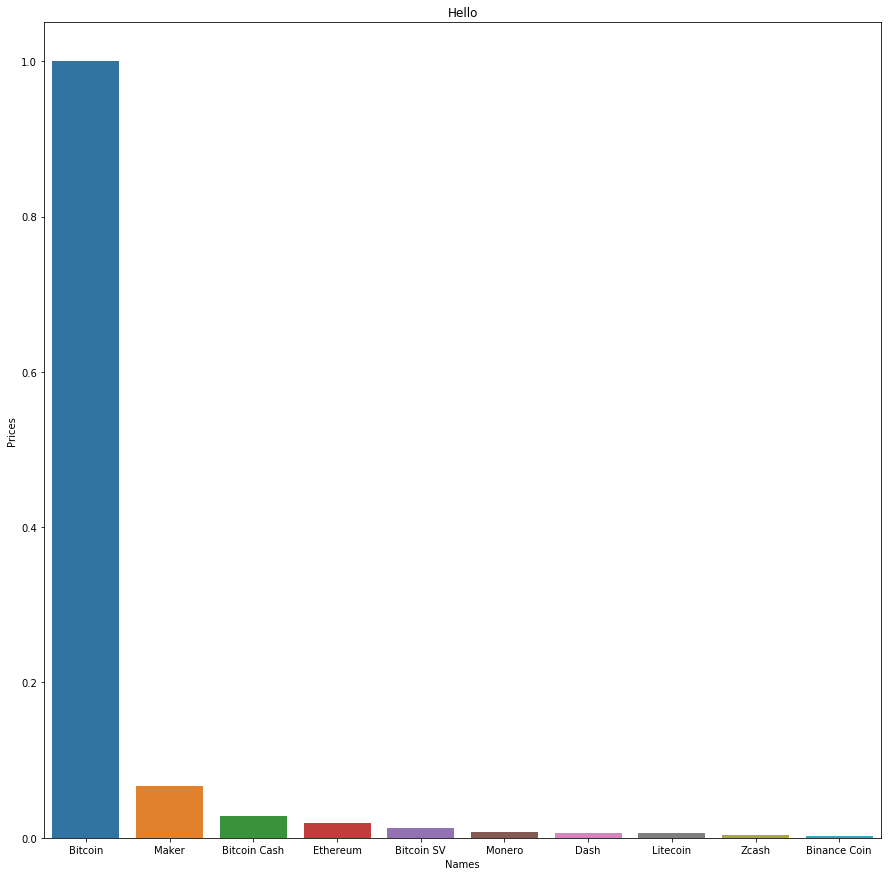

In [62]:
PlotGraph(temp,"Hello")